# House Price Prediction

## Import Libraries

In [1]:
import os
import pandas as pd
import numpy as np
from dotenv import load_dotenv
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from transformations import Transformations

## Load Datasets

In [2]:
load_dotenv()

True

In [3]:
test = pd.read_csv(os.getenv('TEST_DATA'))
train = pd.read_csv(os.getenv('TRAIN_DATA'))

In [4]:
X = train.drop(columns=['SalePrice'])
y = train['SalePrice']
X_test = test

## EDA

### Plotting

c:\Users\jp_gl\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jp_gl\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


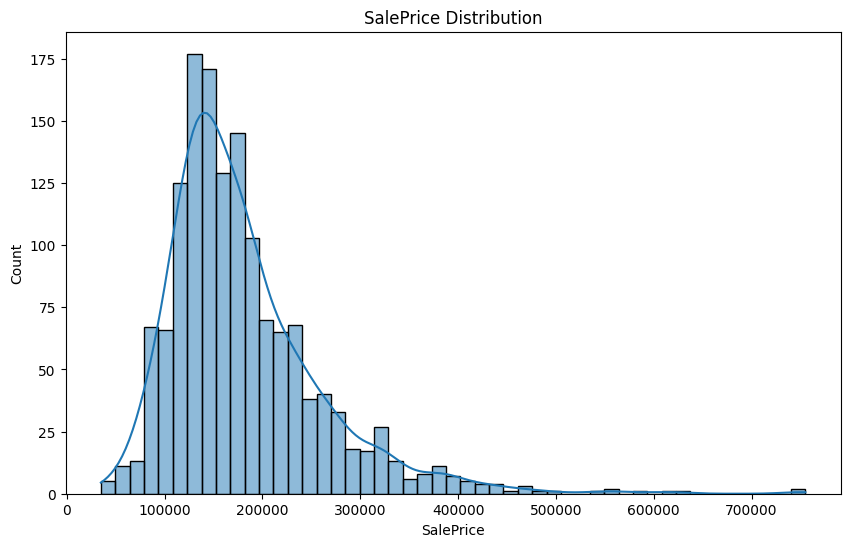

Skewness of target: 1.8809


c:\Users\jp_gl\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


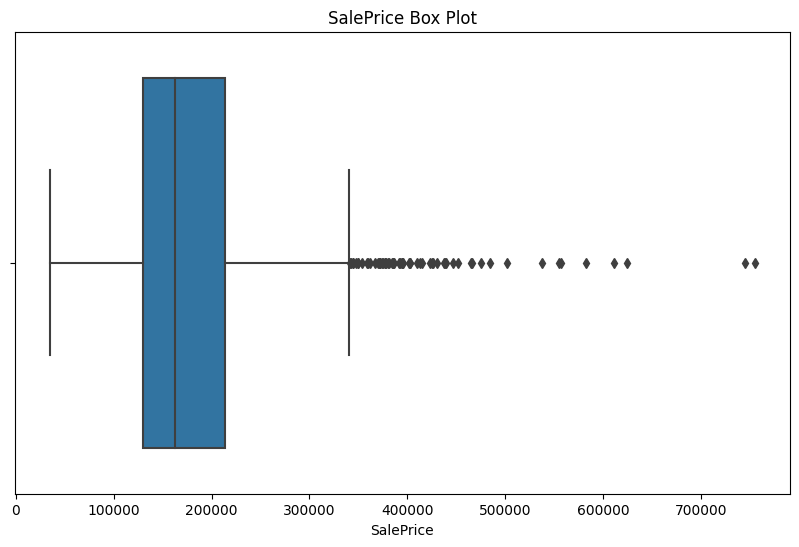

In [5]:
plt.figure(figsize=(10, 6))
sns.histplot(y, kde=True)
plt.title('SalePrice Distribution')
plt.show()

# Check for skewness
skewness = stats.skew(y)
print(f"Skewness of target: {skewness:.4f}")

# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=y)
plt.title('SalePrice Box Plot')
plt.show()

In [6]:
# Keep only numerical columns for now, drop any with missing values
numerical_cols = [col for col in X.columns if X[col].dtype in ['int64', 'float64']]
X_numeric = X[numerical_cols].copy()

In [7]:
# Fill missing values with medians
for col in X_numeric.columns:
    X_numeric[col] = X_numeric[col].fillna(X_numeric[col].median())

In [8]:
X_train, X_val, y_train, y_val = train_test_split(X_numeric, y, test_size=0.2, random_state=42)

### Feature Preparation

In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [10]:
y_train_log = np.log1p(y_train)

## Model

In [11]:
model = LinearRegression()
model.fit(X_train_scaled, y_train_log)

LinearRegression()

### Model Evaluation

In [12]:
y_val_pred_log = model.predict(X_val_scaled)
y_val_pred = np.expm1(y_val_pred_log)

# Evaluate
mse = mean_squared_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)

print(f"Validation MSE: {mse:.4f}")
print(f"Validation R²: {r2:.4f}")

Validation MSE: 889064377.3394
Validation R²: 0.8841


## Results Analysis

c:\Users\jp_gl\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jp_gl\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


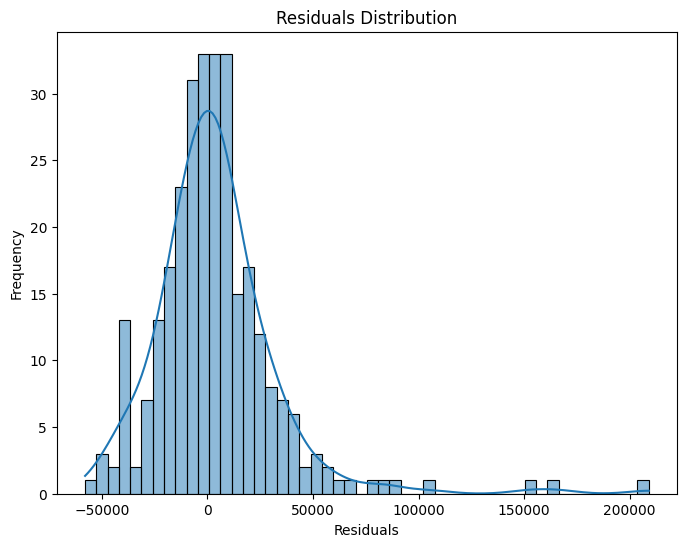

In [13]:
plt.figure(figsize=(8,6))
sns.histplot(y_val - y_val_pred, bins=50, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residuals Distribution")
plt.show()

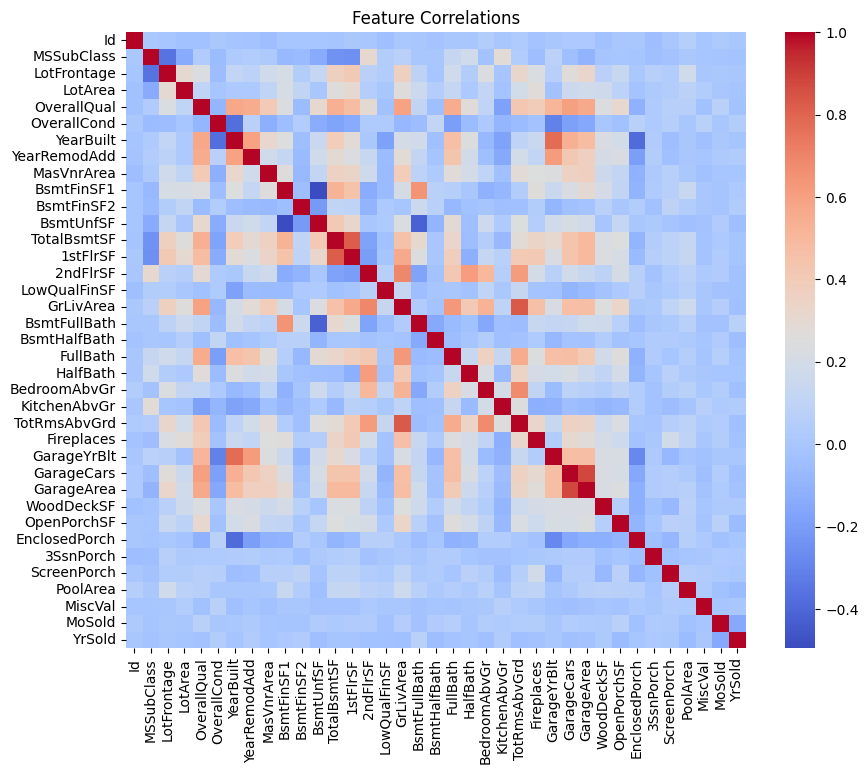

In [14]:
plt.figure(figsize=(10,8))
sns.heatmap(X_numeric.corr(), cmap="coolwarm", annot=False)
plt.title("Feature Correlations")
plt.show()